In [682]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype('float32') / 255)
    plt.title(title)
    plt.show()

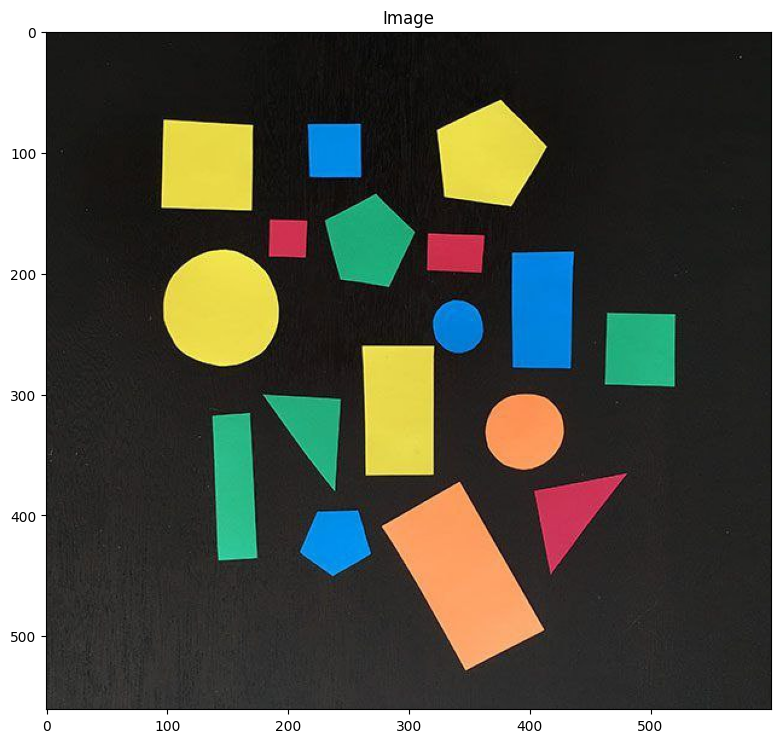

In [683]:
# reading Shapes.jpg
image = cv2.imread("Shapes.jpg")

# Display the image
imshow(image = image)

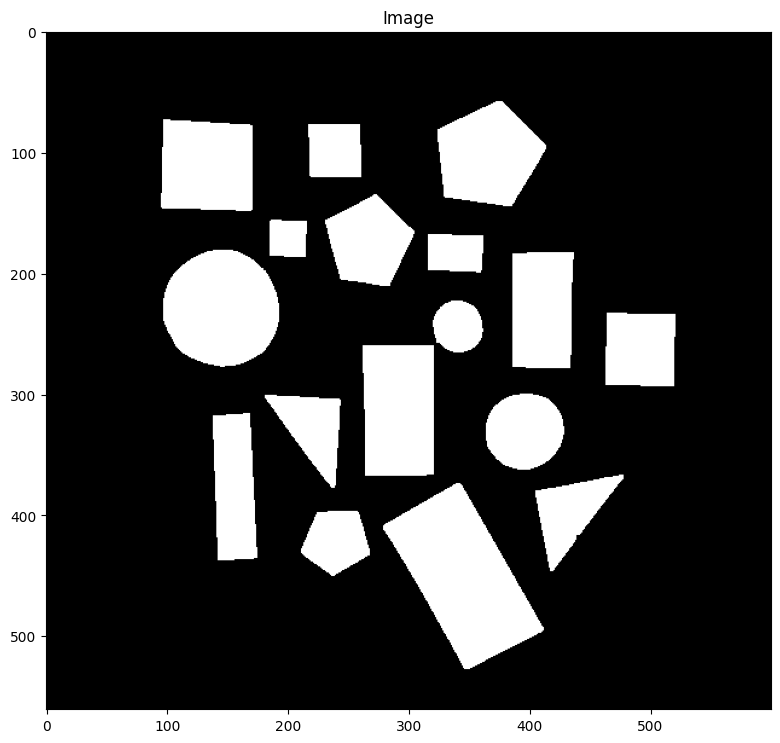

In [684]:
# Using bilateralFilter to remove noise
# image = cv2.bilateralFilter(image, 20, 90, 90)

# Display the image
# imshow(image = image)


# treshhold image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)

# openning morphhology
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

#closing morphology
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)


# Convert the image to grayscale


# Display the image
imshow(image = thresh)



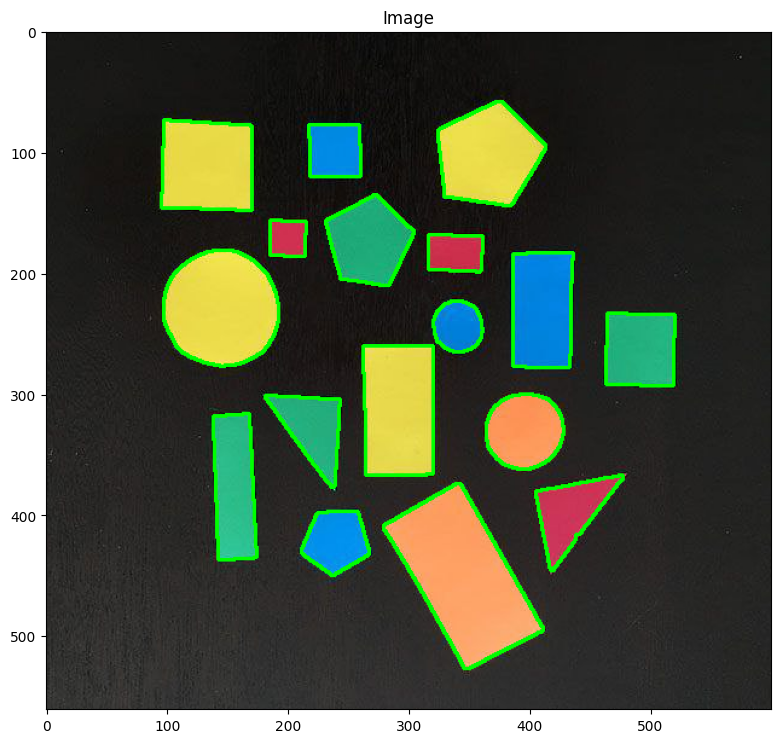

Number of contours found = 17


In [685]:
# Find the contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the image
cntimage = image.copy()
cv2.drawContours(cntimage, contours, -1, (0, 255, 0), 2)

# Display the image
imshow(image = cntimage)

print("Number of contours found = " + str(len(contours)))

In [686]:
findimage = image.copy()
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
    # print (len(approx))
    if len(approx) == 3:
        shape = "Triangle"  
    elif len(approx) == 4:
        shape = "Rectangle"
    elif len(approx) == 5:
        shape = "Pentagon"
    else:
        shape = "Circle"
    # Draw the shape name center of the image
    M = cv2.moments(cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(findimage, shape, (cX-20, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)
    
    
    
        

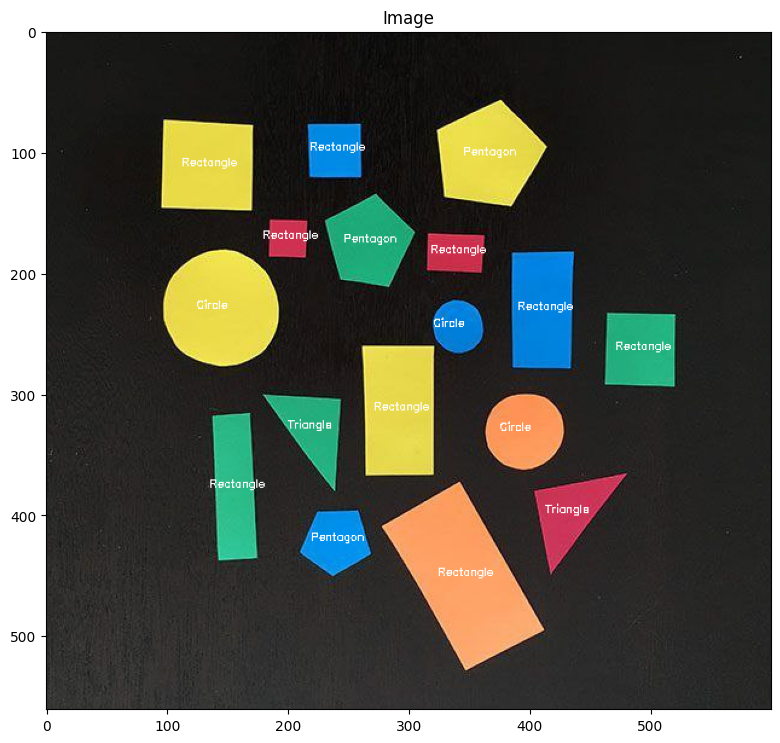

In [687]:
imshow(image = findimage)

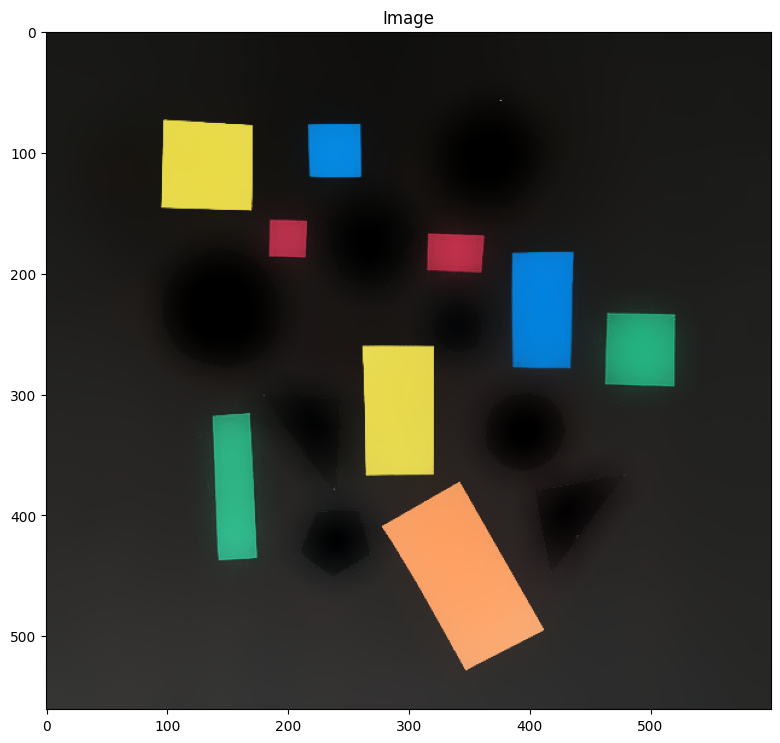

In [688]:
nonRect = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
    # print (len(approx))
    if len(approx) != 4:
        nonRect.append(cnt)

# draw black filled countor in image to remove non rectangle shapes a little bigger than countor
rectimage = image.copy()

cv2.drawContours(rectimage, nonRect, -1, (0, 0, 0), -1)

#bilateralFilter to remove noise
rectimage = cv2.bilateralFilter(rectimage, 50, 130, 130)
imshow(image = rectimage)

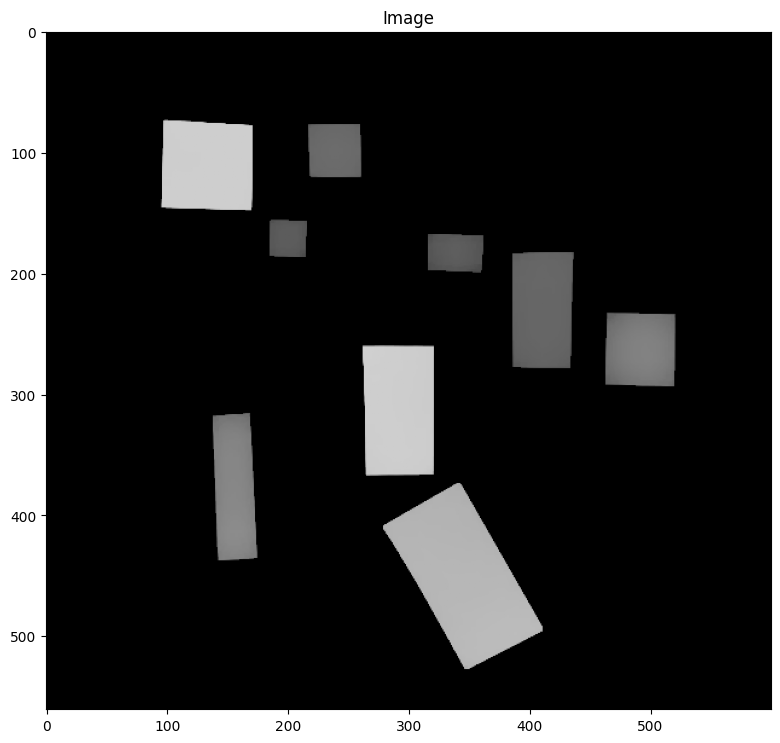

In [689]:
# decompose image to YCrCb
YCrCb = cv2.cvtColor(rectimage, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(YCrCb)

# threshold Y channel(Grayscale)
Ythresh = np.where(Y > 60, Y, 0)

# openning morphhology
kernel = np.ones((3,3), np.uint8)
Ythresh = cv2.morphologyEx(Ythresh, cv2.MORPH_OPEN, kernel)

#closing morphology
Ythresh = cv2.morphologyEx(Ythresh, cv2.MORPH_CLOSE, kernel, iterations=2)

imshow(image = Ythresh)


In [690]:
# rebulid image
YCrCb = cv2.merge((Ythresh, Cr, Cb))
image = cv2.cvtColor(YCrCb, cv2.COLOR_YCrCb2BGR)

imshow(image = image)


Question 2

In [691]:
# Read the image
img = cv2.imread("FARMS_2.jpeg")
image = img.copy()
imshow("Original Image", img)

In [692]:
# Pick the red channel of the image instead of grayscale
imageB, imageG, imageR = cv2.split(img)
gray = imageR

# Display the image
imshow("Red Channel", gray)

In [693]:
# bilateralFilter to remove noise
blt = cv2.bilateralFilter(gray, 5, 45, 45)
imshow("Bilateral Filter", blt)

In [694]:
# Increasing Contrast
sharpening_kernel = np.array([[-1, -1, -1], [-1, 10, -1], [-1, -1, -1]])
# Apply the sharpening filter
Enhanced = cv2.filter2D(blt, -1, sharpening_kernel)

# Display the image
imshow("Enhanced Image", Enhanced)

In [695]:
# bilateralFilter to remove noise
blt = cv2.bilateralFilter(Enhanced, 5, 45, 45)
imshow("Bilateral Filter", blt)

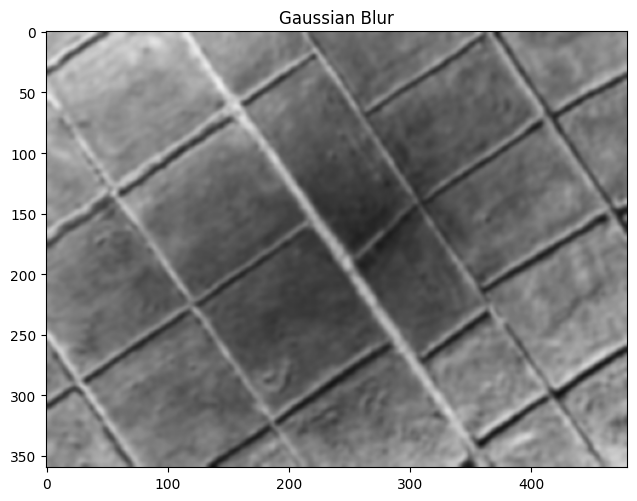

In [696]:
# Blur the image
blur = cv2.GaussianBlur(blt, (11, 11), 0)


# Display the image
imshow("Gaussian Blur", blur)

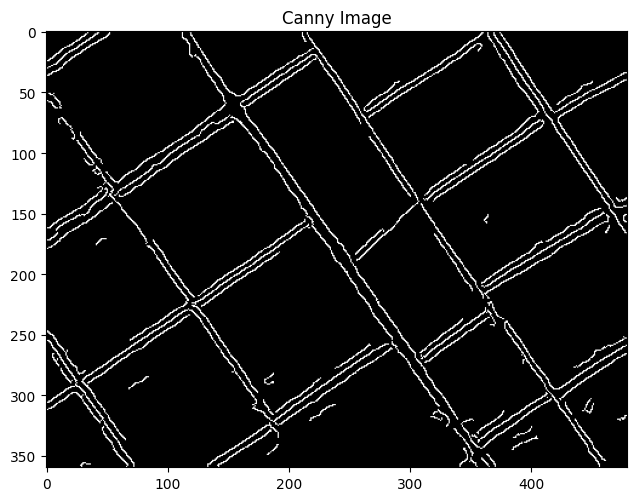

In [697]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  med_val = np.median(image) 
  lower = int(max(0, 0.67 * med_val))
  upper = int(min(255, 1.32 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

# Canny image
canny_image = autoCanny(blur)

# Display the image
imshow("Canny Image", canny_image)

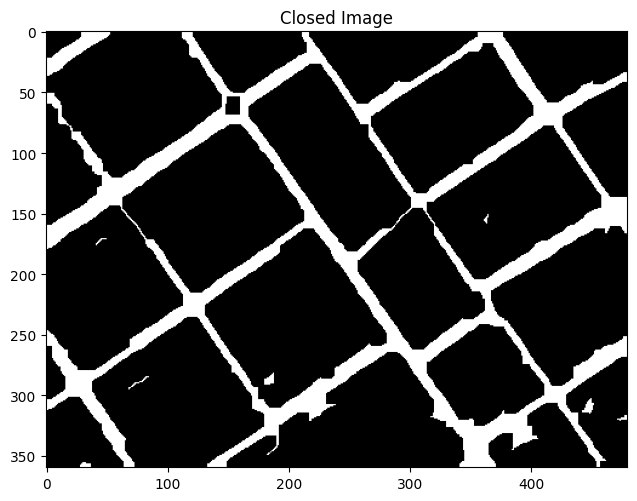

In [698]:
# Opening
Closed_image = cv2.morphologyEx(canny_image, cv2.MORPH_CLOSE, np.ones((9, 9), np.uint8), iterations=1)

# Display the image
imshow("Closed Image", Closed_image)

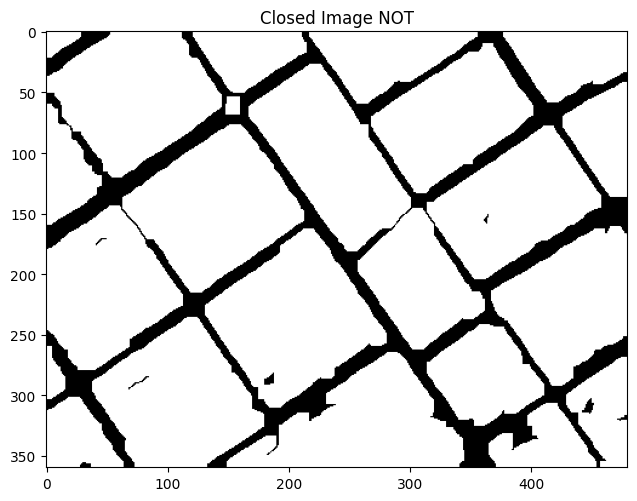

In [699]:
# Bitwise NOT -> the background should be black
Closed_image_Not = cv2.bitwise_not(Closed_image)

# Display the image
imshow("Closed Image NOT", Closed_image_Not)

In [700]:
# bilateralFilter to remove noise
# Closed_image_Not = cv2.bilateralFilter(Closed_image_Not, 5, 45, 45)

# Display the image
# imshow("Closed Image NOT", Closed_image_Not)

In [701]:
# erosion = Closed_image_Not.copy()

# Erosion   
kernel = np.ones((2,2),np.uint8)
Closed_image_Not = cv2.erode(Closed_image_Not,kernel,iterations = 1)

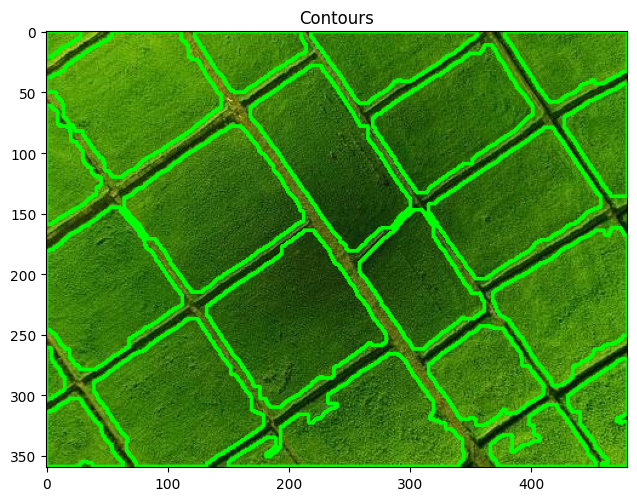

In [702]:
# extracting contours
contours, hierarchy2 = cv2.findContours(Closed_image_Not, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


# sorting contours by their area
contours = sorted(contours, key=cv2.contourArea, reverse=True)
result_image = img.copy()
# writing the rank of farms according to their areas
target_conturs = []
for i, cntr in enumerate(contours):
    if cv2.contourArea(cntr) < 200:
        continue
    # Find the centeroid of contours
    M = cv2.moments(cntr)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.drawContours(result_image, [cntr], -1, (0, 255, 0), 2)
    # cv2.putText(result_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,100), 2)
    # print("Farm " + str(i+1) + " Area: " + str(cv2.contourArea(cntr)) + " pixels")
    target_conturs.append(cntr)
    
# showing result
imshow('Contours', result_image)

Farm 1 Area: 11763.5 pixels
Farm 2 Area: 11335.0 pixels
Farm 3 Area: 10756.5 pixels
Farm 4 Area: 10711.5 pixels
Farm 5 Area: 9959.0 pixels
Farm 6 Area: 9584.0 pixels
Farm 8 Area: 9432.0 pixels
Farm 9 Area: 8884.5 pixels
Farm 10 Area: 8598.0 pixels
Farm 11 Area: 6287.5 pixels
Farm 12 Area: 4854.0 pixels


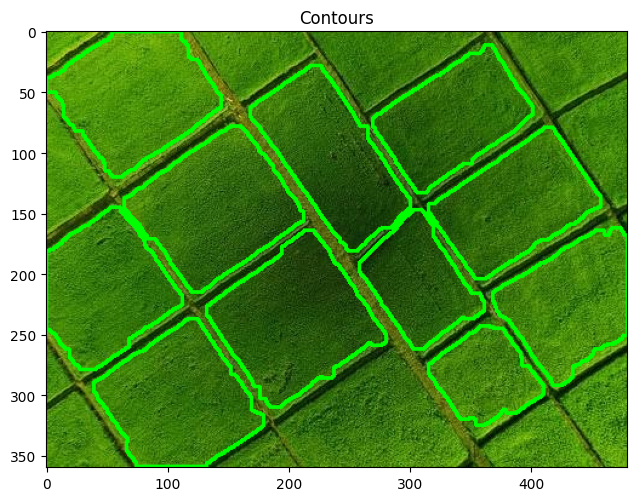

In [703]:
# Extracting the target contours (thoes that are not in the border)
target_conturs2 = []
result_image = img.copy()
for i, cntr in enumerate(contours):
    if cv2.contourArea(cntr) < 1000:
        continue
    # Find the centeroid of contours
    M = cv2.moments(cntr)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    if cx < 35 or cx > img.shape[1] - 35 or cy < 35 or cy > img.shape[0] - 35:
        continue
    target_conturs2.append(cntr)
    cv2.drawContours(result_image, [cntr], -1, (0, 255, 0), 2)
    # cv2.putText(result_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,100), 2)
    print("Farm " + str(i+1) + " Area: " + str(cv2.contourArea(cntr)) + " pixels")
imshow('Contours', result_image)

C:\Users\PADIDAR\AppData\Local\Temp\ipykernel_16944\2934283450.py:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


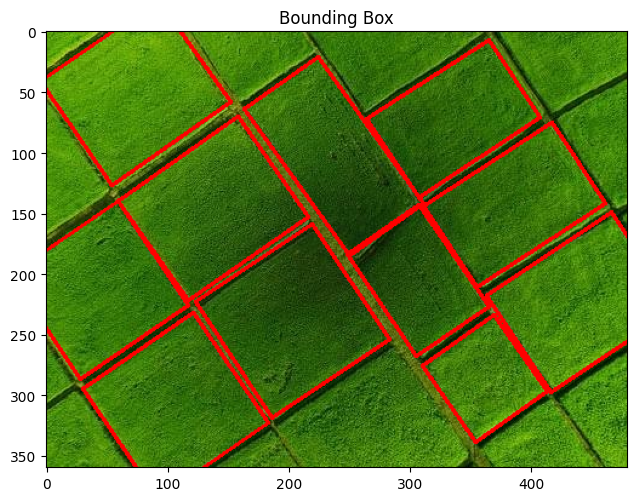

In [704]:
# finding rotaret bounding box for target contours
result_image = img.copy()
list_of_rects = []
for i, cntr in enumerate(target_conturs2):
    rect = cv2.minAreaRect(cntr)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(result_image, [box], 0, (0, 0, 255), 2)
    list_of_rects.append(box)
imshow('Bounding Box', result_image)

Farm 1 Area: 13311.5 pixels
Farm 2 Area: 12333.5 pixels
Farm 3 Area: 12198.5 pixels
Farm 4 Area: 12187.0 pixels
Farm 5 Area: 11897.0 pixels
Farm 6 Area: 11192.0 pixels
Farm 7 Area: 11122.0 pixels
Farm 8 Area: 10138.0 pixels
Farm 9 Area: 9266.0 pixels
Farm 10 Area: 7355.5 pixels
Farm 11 Area: 5565.0 pixels


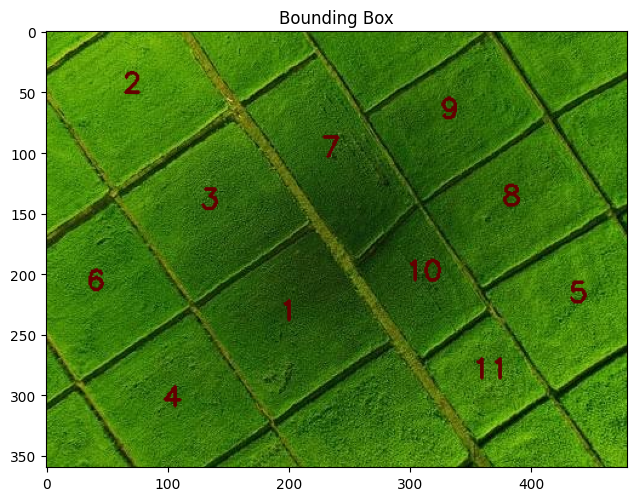

In [705]:
# sort and rank the farms according to their boxes surface
list_of_rects = sorted(list_of_rects, key=cv2.contourArea, reverse=True)
result_image = img.copy()
for i, rect in enumerate(list_of_rects):
    # cv2.drawContours(result_image, [rect], 0, (0, 0, 255), 2)
    M = cv2.moments(rect)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(result_image, str(i+1), (cx - 10 , cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,100), 2)
    print("Farm " + str(i+1) + " Area: " + str(cv2.contourArea(rect)) + " pixels")
imshow('Bounding Box', result_image)

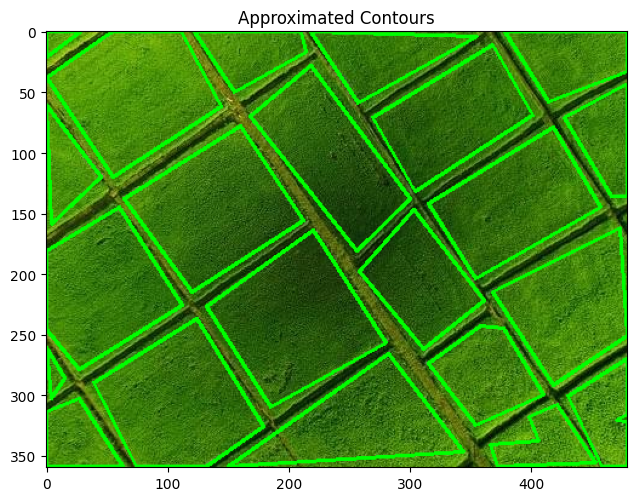

In [706]:
# creating a Douglas-Peucker algorithm to get the approximated contours
def approx_contours(contours, epsilon):
    approximated_contours = []
    for contour in contours:
        approximated_contour = cv2.approxPolyDP(contour, epsilon, True)
        approximated_contours.append(approximated_contour)
    return approximated_contours

# spliting the contours into 2 parts the one with the area bigger than 8000 and the other with the area less than 8000
big_contours = []
small_contours = []
for contour in target_conturs:
    if cv2.contourArea(contour) > 8000:
        big_contours.append(contour)
    else:
        small_contours.append(contour)

# Approximate the contours
epsilon = 0.030* cv2.arcLength(target_conturs[0], True)
approximated_big_contours = approx_contours(big_contours, epsilon)
approximated_small_contours = approx_contours(small_contours, 0.55 * epsilon)

# merge the approximated contours
approximated_contours = approximated_big_contours + approximated_small_contours

# Draw the approximated contours
approximated_image = img.copy()
cv2.drawContours(approximated_image, approximated_contours, -1, (0, 255, 0), 2)

# Display the image
imshow("Approximated Contours", approximated_image)

In [708]:
# sort and rank the contours by their surface area
approximated_contours = sorted(approximated_contours, key=cv2.contourArea, reverse=True)
result_image = approximated_image
for i, cntr in enumerate(approximated_contours):
    if cv2.contourArea(cntr) < 200:
        continue
    # Find the centeroid of contours
    M = cv2.moments(cntr)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # cv2.drawContours(result_image, [cntr], -1, (0, 255, 0), 2)
    cv2.putText(result_image, str(i+1), (cx-10, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
    print("Farm " + str(i+1) + " Area: " + str(cv2.contourArea(cntr)) + " pixels")
    # cv2.putText(result_image, str(cv2.contourArea(cntr)), (cx - 30, cy + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)

# showing result
imshow('Contours', result_image)
    

Farm 1 Area: 11329.0 pixels
Farm 2 Area: 10498.0 pixels
Farm 3 Area: 10397.0 pixels
Farm 4 Area: 10395.0 pixels
Farm 5 Area: 9124.0 pixels
Farm 6 Area: 8971.0 pixels
Farm 7 Area: 8806.0 pixels
Farm 8 Area: 8229.0 pixels
Farm 9 Area: 8205.0 pixels
Farm 10 Area: 7922.0 pixels
Farm 11 Area: 5826.5 pixels
Farm 12 Area: 4436.5 pixels
Farm 13 Area: 4001.5 pixels
Farm 14 Area: 3963.5 pixels
Farm 15 Area: 2840.5 pixels
Farm 16 Area: 2767.5 pixels
Farm 17 Area: 2762.5 pixels
Farm 18 Area: 2371.5 pixels
Farm 19 Area: 2278.5 pixels
Farm 20 Area: 2087.0 pixels
Farm 21 Area: 294.0 pixels
Farm 22 Area: 265.0 pixels


In [709]:
# preview of task 3
import torch
from torchvision import models, transforms
from PIL import Image

def getName(path : str):
    # Load the pre-trained model
    model = models.resnet50(pretrained=True)
    model.eval()

    # Define the image transformation
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load and transform the image
    image_path = path  # replace with your image path
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        outputs = model(image)

    # Get the predicted class
    _, predicted = torch.max(outputs, 1)
    print('Predicted class:', predicted.item())



    import json

    with open('imagenet.json') as json_file:
        labels_dict = json.load(json_file)

    lable_name = labels_dict[str(predicted.item())]
    print(f'the class name is {lable_name}')

In [710]:
getName('photo_2024-07-01_23-07-27.jpg')

Predicted class: 968
the class name is cup
